In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
train_df = pd.read_csv("C:/Users/HP/Downloads/Logistic Regression (2)/Logistic Regression/Titanic_train.csv")
test_df = pd.read_csv("C:/Users/HP/Downloads/Logistic Regression (2)/Logistic Regression/Titanic_test.csv")

### About the Features of the Dataset
#### Continuous Features:
- "Age": Represents the age of passengers, which is a continuous variable as it can take any value within a certain range.
- "Fare": Represents the fare paid by passengers, which is also a continuous variable as it can take any value within a certain range.
#### Discrete Features:
- "PassengerId": Represents the unique identifier for each passenger. Although it is numeric, it serves as an identifier rather than a continuous measurement.
- "Survived": Represents whether a passenger survived or not, which is a binary categorical variable.
- "Pclass": Represents the passenger class, which is categorical with three distinct values (1st, 2nd, and 3rd class).
- "SibSp": Represents the number of siblings or spouses aboard the Titanic, which is a count of discrete entities.
- "Parch": Represents the number of parents or children aboard the Titanic, which is also a count of discrete entities.
- "Name", "Sex", "Ticket", "Cabin", "Embarked": These columns contain categorical data, but they are not discrete in the same sense as "Survived", "Pclass", "SibSp", and "Parch". They have many distinct values and don't represent counts or categories in the same way.
#### We can say that only "Age" and "Fare" are the continuous features in your data, while the rest are discrete or categorical features.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('The number of samples into the train data is: {}'.format(train_df.shape[0]))

The number of samples into the train data is: 891


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print('The number of samples in test data is: {}'.format(test_df.shape[0]))

The number of samples in test data is: 418


#### Note: There is no target variable into the test data (i.e. "Survival" column is missing), so the goal is to predict this target using different machine learning algorithms such as logistic regression
### Data Quality & Missing Value Assessment

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Age - Missing Values

In [8]:
# Percentage of missing "Age"
missing_age_percentage = (train_df['Age'].isnull().sum()/len(train_df))*100
print(f"Percent of missing 'Age' record is {missing_age_percentage:.2f}%")

Percent of missing 'Age' record is 19.87%


~ 20% of entries for passenger age are missing. Lets see whats the Age variable looks like in general.

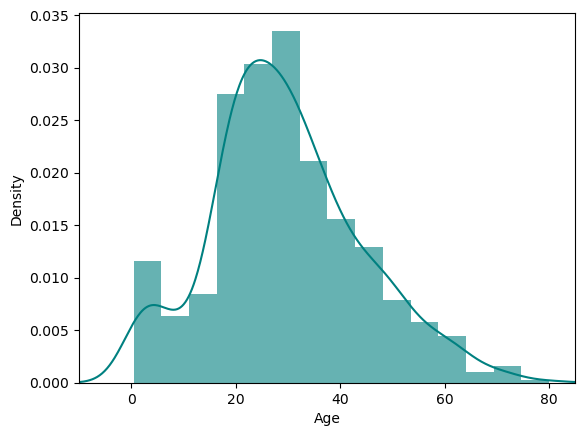

In [9]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

### Since the Age is (right) skewed, using mean might gives us biased results. To deal with this, we'll use the median to impute the missing values.

In [10]:
print('The mean of Age is {:.2f}'.format(train_df['Age'].mean(skipna=True)))
print('The median of Age is {:.2f}'.format(train_df['Age'].median(skipna=True)))

The mean of Age is 29.70
The median of Age is 28.00


#### Cabin - Missing Values

In [11]:
# Percentage of missing "Cabin"
print('Percentage of missing Cabin records is {:.2f} %'.format((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing Cabin records is 77.10 %


77% records are missing, which means that imputing information and using this variable for prediction is probably not wise. We will ignore this variable in our model.

#### Embarked - Missing Values

In [12]:
# Percentage of missing "Embarked"
print('Percentage of missing "Embarked" is {:.2f} %'.format((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Embarked" is 0.22 %


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


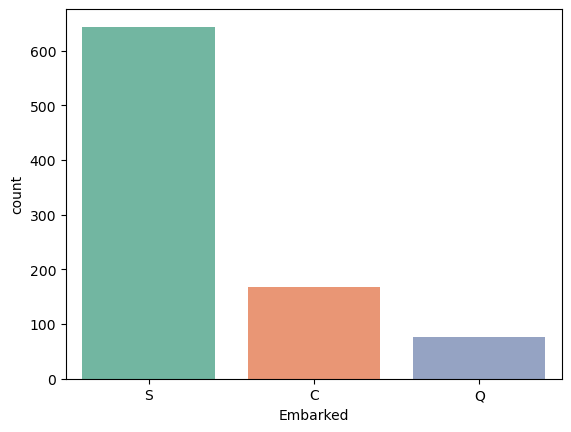

In [13]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train_df,palette='Set2')
plt.show()

In [14]:
print('The most common Boarding Point of Embarkation is {}'.format(train_df['Embarked'].value_counts().idxmax()))

The most common Boarding Point of Embarkation is S


By far the most passengers boarded in Southhampton, so we will impute those 2 NAN's with S

### Final Adjustments to Data (Train & Test)

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

- If "Age" is missing for a given row, I'll impute with 28 (median age).
- If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
- I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [15]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True),inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(),inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [16]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


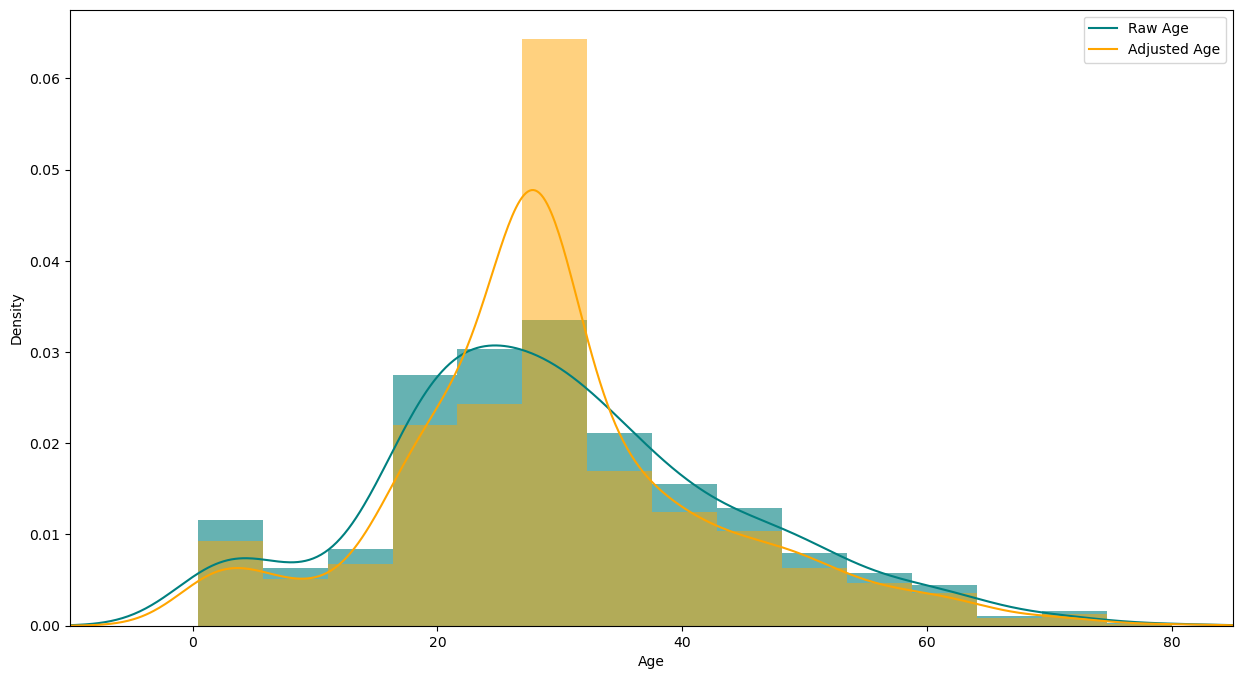

In [18]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
train_df['Age'].plot(kind='density',color='teal')
ax = train_data["Age"].hist(bins=15,density=True,stacked=True,color='orange',alpha=0.5)
train_data['Age'].plot(kind='density',color='orange')
ax.legend(['Raw Age','Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#### Additional Variables
Both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [19]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

I'll also create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked").

In [20]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
test_df['Fare'].median()

14.4542

### Now, apply the same changes to the test data.
- I will apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = 28).
- I'll also remove the "Cabin" variable from the test data, as I've decided not to include it in my analysis.
- There were no missing values in the "Embarked" port variable.
- I'll add the dummy variables to finalize the test set.
- Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45.

In [23]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
test_data = test_df.copy()
test_data['Age'].fillna(train_df['Age'].median(skipna=True),inplace=True)
test_data['Fare'].fillna(train_df['Fare'].median(skipna=True),inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

test_data['TravelAlone']=np.where((test_df["SibSp"]+test_df["Parch"])>0,0,1)

test_data.drop("SibSp",axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

testing = pd.get_dummies(test_data,columns=['Pclass','Embarked','Sex'])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


### Exploratory Data Analysis
### Exploration of Age

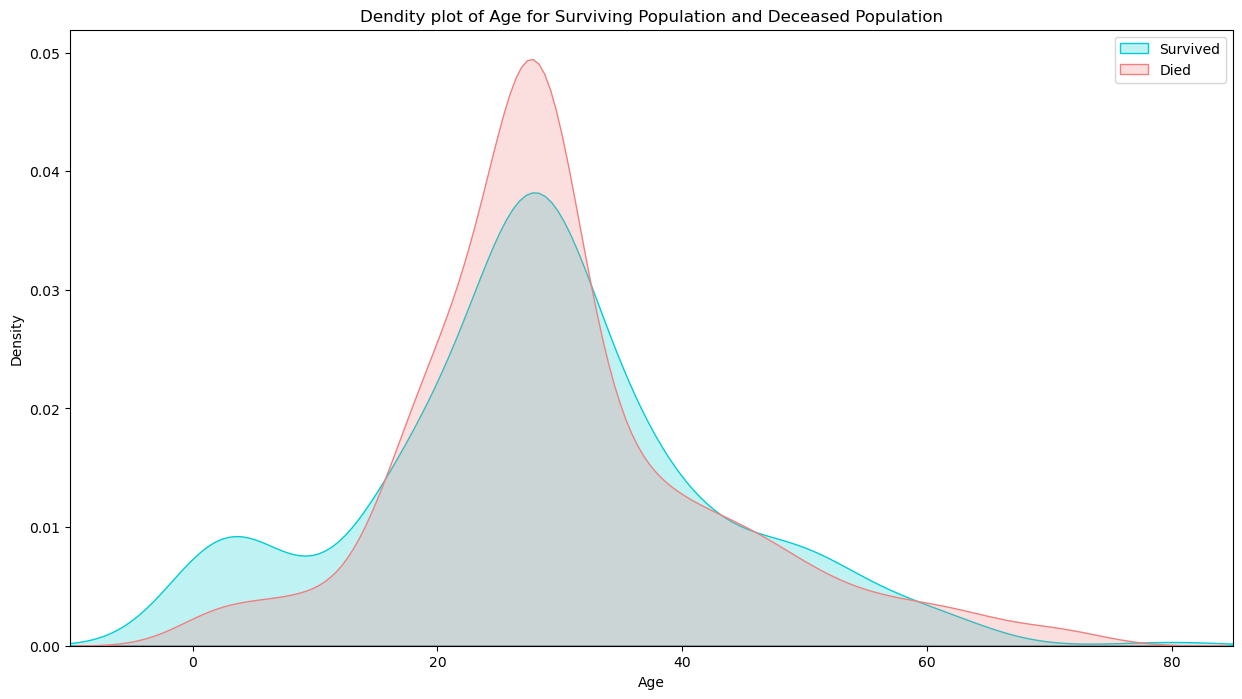

In [25]:
plt.figure(figsize=(15,8))
ax= sns.kdeplot(final_train['Age'][final_train.Survived==1],color="darkturquoise",shade=True)
sns.kdeplot(final_train['Age'][final_train.Survived==0],color='lightcoral',shade=True)
plt.legend(['Survived','Died'])
plt.title('Dendity plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#### The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

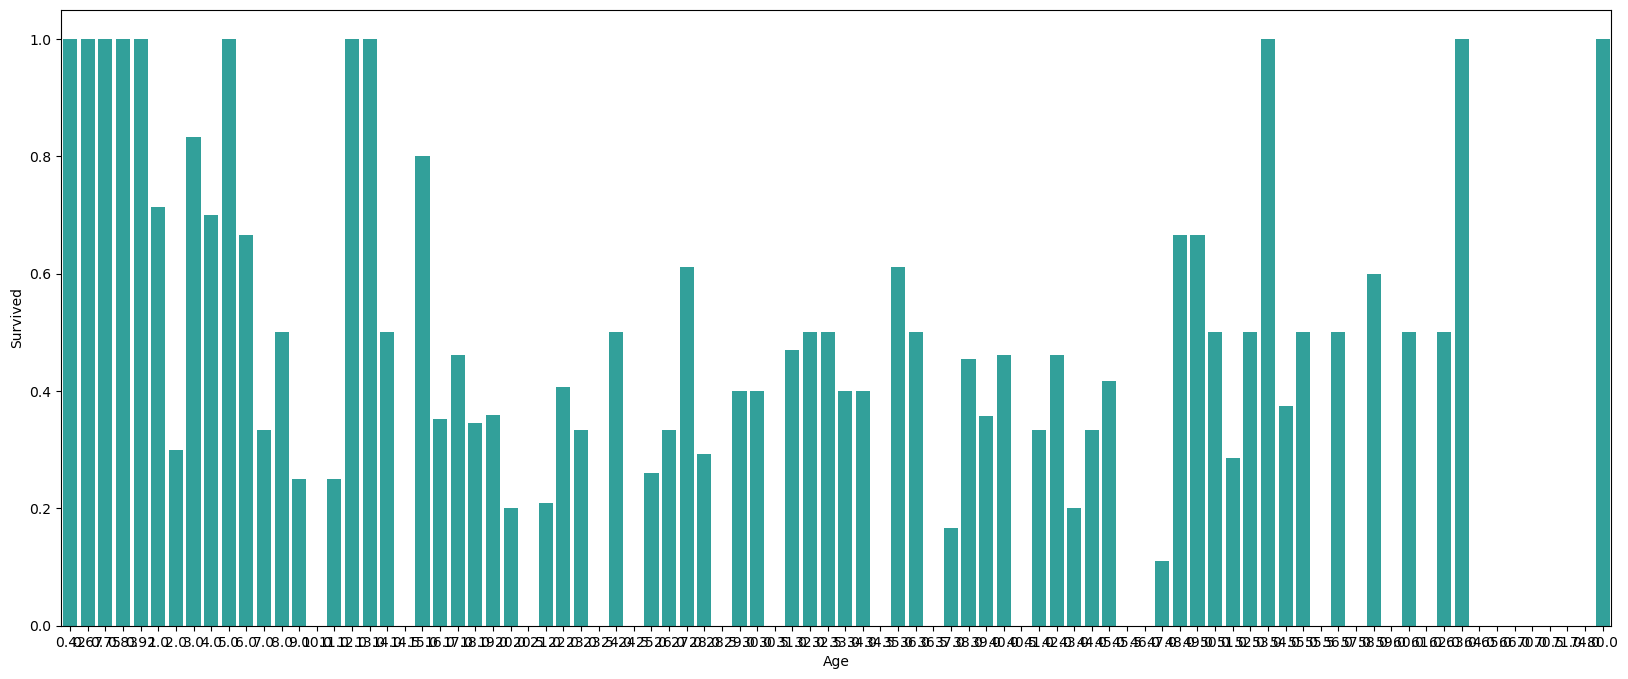

In [26]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[['Age','Survived']].groupby('Age',as_index=False).mean()
g = sns.barplot(x='Age',y='Survived',data=avg_survival_byage,color='LightSeaGreen')
plt.show()

#### Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [27]:
final_train['IsMinor']= np.where(final_train['Age']<=16,1,0)
final_test['IsMinor'] = np.where(final_test['Age']<=16,1,0)

### Exploration of Fare

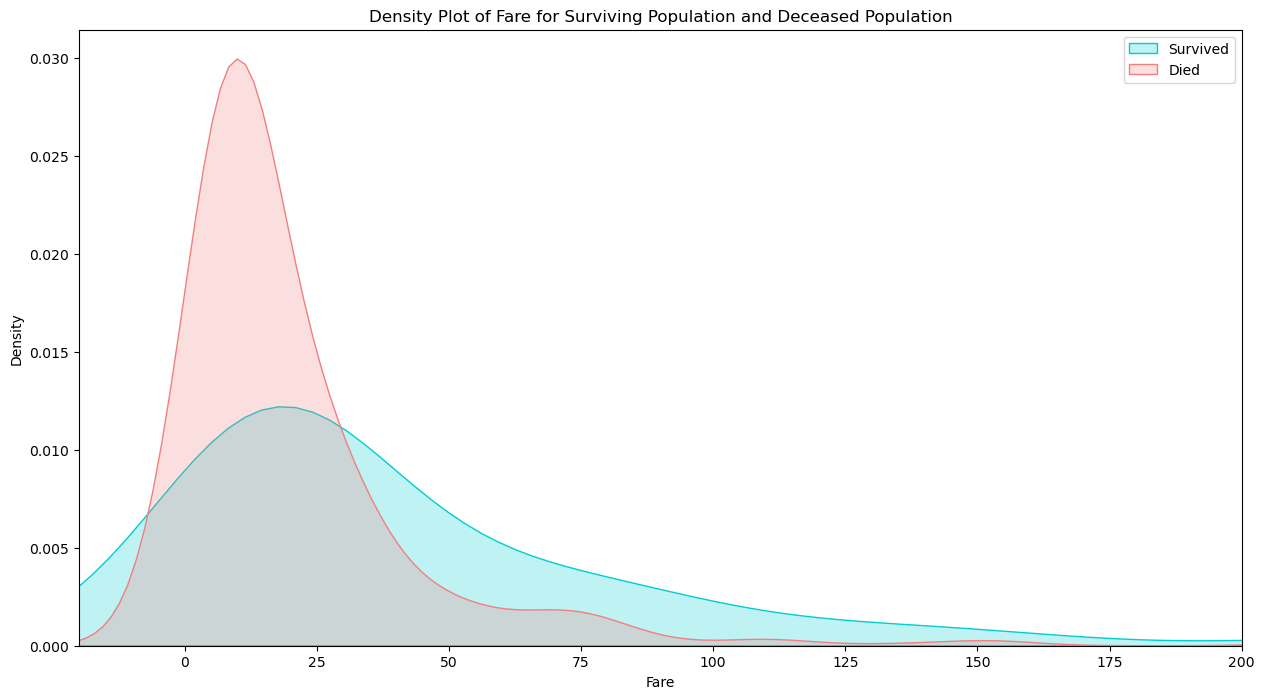

In [28]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

#### As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

### Exploration of Passenger Class

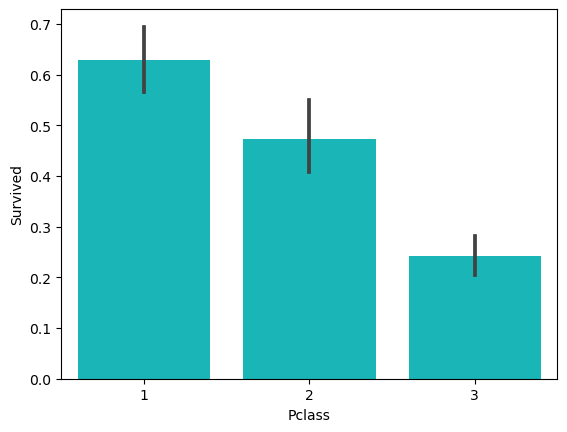

In [29]:
sns.barplot(x='Pclass', y='Survived', data=train_df, color="darkturquoise")
plt.show()

#### Unsurprisingly, being a first class passenger was safest.

### Exploration of Embarked Port

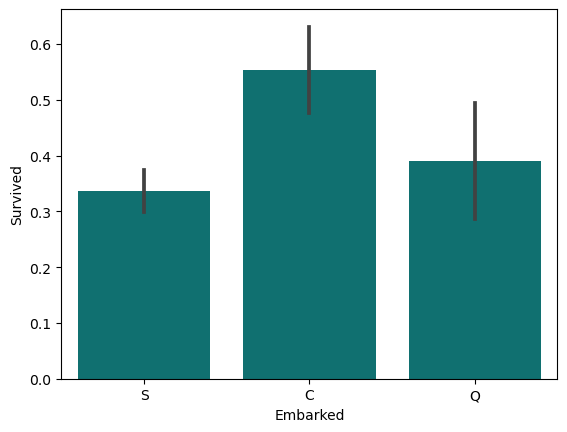

In [30]:
sns.barplot(x='Embarked',y='Survived',data=train_df,color='teal')
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck). It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.
### Exploration of Traveling Alone vs. With Family

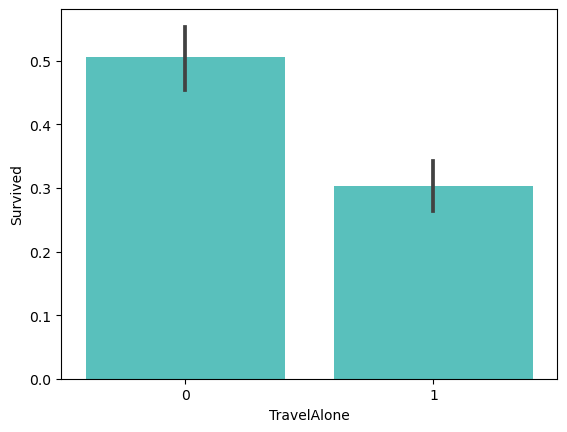

In [31]:
sns.barplot(x='TravelAlone',y='Survived',data=final_train,color='mediumturquoise')
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male

### Exploration of Gender Variable

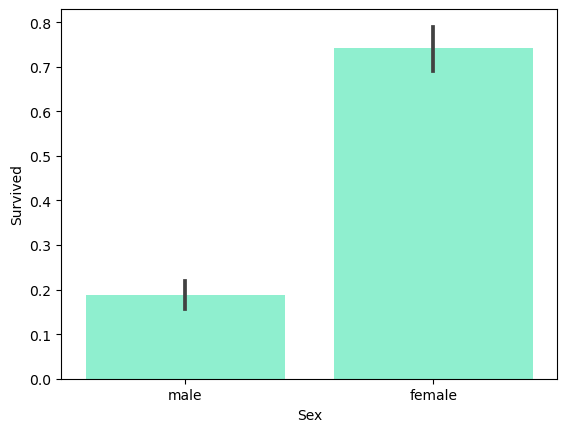

In [32]:
sns.barplot(x='Sex',y='Survived',data=train_df,color='aquamarine')
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.
### Logistic Regression and Results
### Feature selection
### Recursive feature elimination
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]

X = final_train[cols]
y = final_train['Survived']

# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes

rfe = RFE(estimator=model,n_features_to_select=8)
rfe = rfe.fit(X,y)
# summarize the selection of the attributes
print('Selected Features: {}'.format(list(X.columns[rfe.support_])))

Selected Features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


### Feature ranking with recursive feature elimination and cross-validation
RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of Features: 9
Selected Features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


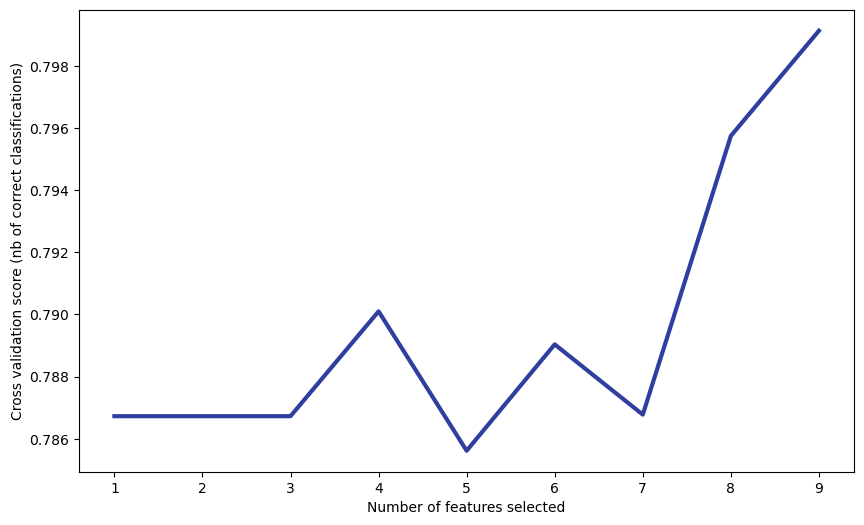

In [34]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(),step=1,cv=10,scoring='accuracy')
rfecv.fit(X,y)

print('Optimal number of Features: {}'.format(rfecv.n_features_))
print('Selected Features: {}'.format(list(X.columns[rfecv.support_])))

# Plot number of features VS. cross validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
## plt.plot(range(1, len(rfecv.grid) + 1), rfecv.grid_scores_)
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], color='#303F9F', linewidth=3)
plt.show()


As we see, nine variables were kept.

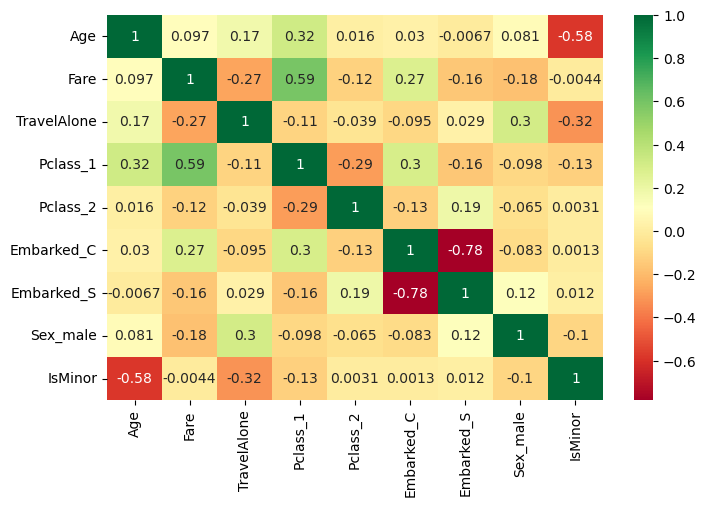

In [35]:
Selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Review of model evaluation procedures¶
Motivation: Need a way to choose between machine learning models

- Goal is to estimate likely performance of a model on out-of-sample data
Initial idea: Train and test on the same data

- But, maximizing training accuracy rewards overly complex models which overfit the training data
Alternative idea: Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on different data
- Testing accuracy is a better estimate than training accuracy of out-of-sample performance
- Problem with train/test split
  - It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
   - Testing accuracy can change a lot depending on a which observation happen to be in the testing set
 ### Model evaluation based on simple train/test split using train_test_split() function

Train/Test split results:
LogisticRegression accuracy is 0.771
LogisticRegression logloss is 0.506
LogisticRegression auc is 0.839


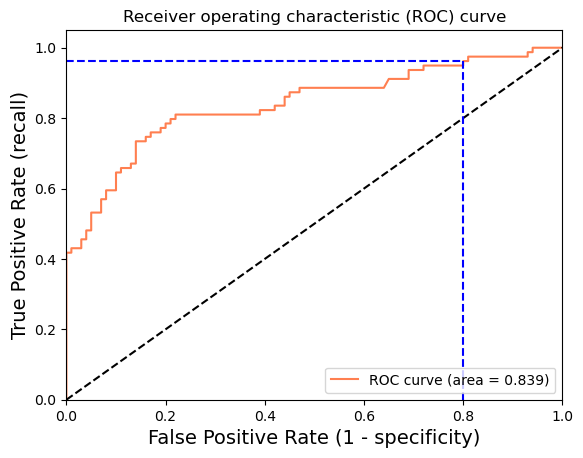

Using a threshold of 0.067 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
[fpr,tpr,thr]  = roc_curve(y_test,y_pred_proba)

print('Train/Test split results:')
print("{} accuracy is {:.3f}".format(logreg.__class__.__name__,accuracy_score(y_test,y_pred)))
print("{} logloss is {:.3f}".format(logreg.__class__.__name__,log_loss(y_test,y_pred_proba)))
print("{} auc is {:.3f}".format(logreg.__class__.__name__, auc(fpr,tpr)))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
idx

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of {:.3f} guarantees a sensitivity of {:.3f} and a specificity of {:.3f}, i.e. a false positive rate of {:.2f}%.".format(thr[idx], tpr[idx], 1 - fpr[idx], np.array(fpr[idx]) * 100))


### Model evaluation based on K-fold cross-validation using cross_val_score() function

In [37]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many

scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print('{} average accuracy is {:.3f}'.format(logreg.__class__.__name__,scores_accuracy.mean()))
print('{} average log_loss is {:.3f}'.format(logreg.__class__.__name__,-scores_log_loss.mean()))
print('{} average auc is {:.3f}'.format(logreg.__class__.__name__,scores_auc.mean()))

K-fold cross-validation results:
LogisticRegression average accuracy is 0.799
LogisticRegression average log_loss is 0.455
LogisticRegression average auc is 0.849


### Model evaluation based on K-fold cross-validation using cross_validate() function

In [38]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()),return_train_score=False)

print('K-fold cross-validation results:')

for sc in range(len(scoring)):
    print("{} average {}: {:.3f} (+/-{:.3f})".format(
        modelCV.__class__.__name__,
        list(scoring.keys())[sc],
        -results['test_{}'.format(list(scoring.values())[sc])].mean() 
        if list(scoring.values())[sc] == 'neg_log_loss' 
        else results['test_{}'.format(list(scoring.values())[sc])].mean(),
        results['test_{}'.format(list(scoring.values())[sc])].std()
    ))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.799 (+/-0.028)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


### GridSearchCV evaluating using multiple scorers simultaneously

best params: LogisticRegression(C=2.4000100000000004)
best params: {'C': 2.4000100000000004}
best score: 0.8013732833957553


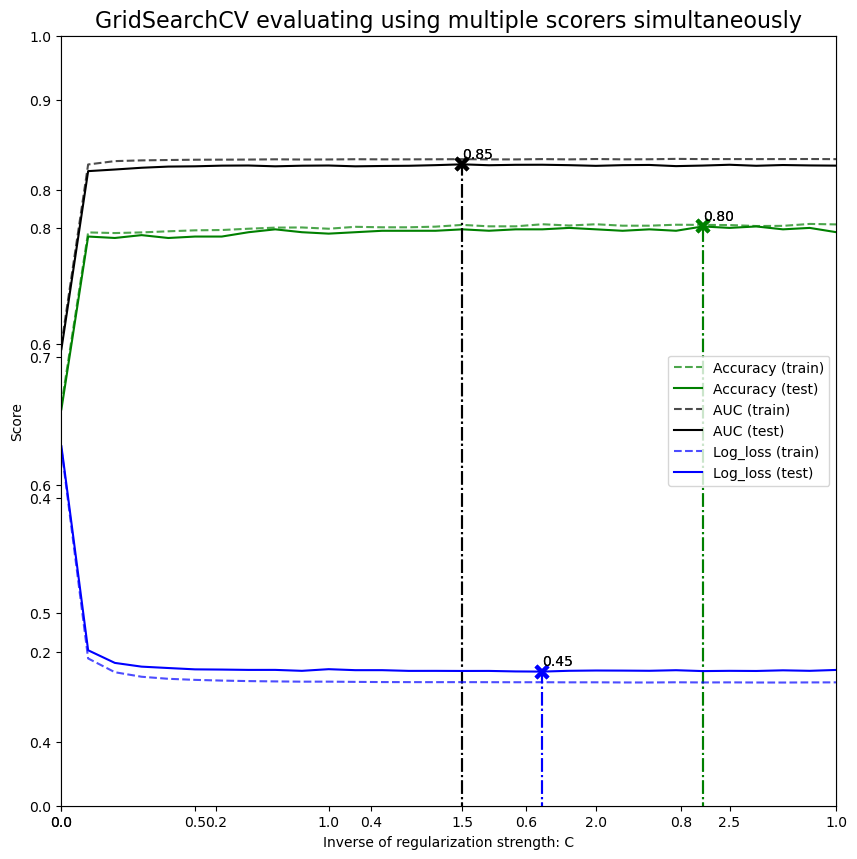

In [42]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True, 
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: {}".format(gs.best_estimator_))
print("best params: {}".format(gs.best_params_))
print('best score: {}'.format(gs.best_score_))
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean_calculation = f"-results['mean_{sample}_{scorer}']" if scoring[scorer] == 'neg_log_loss' else f"results['mean_{sample}_{scorer}']"
        sample_score_mean = eval(sample_score_mean_calculation)
        sample_score_std = results[f"std_{sample}_{scorer}"]
        alpha = 0.1 if sample == 'test' else 0
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label=f"{scorer} ({sample})")
        best_index = np.nonzero(results[f'rank_test_{scorer}'] == 1)[0][0]
        best_score = -results[f'mean_test_{scorer}'][best_index] if scoring[scorer] == 'neg_log_loss' else results[f'mean_test_{scorer}'][best_index]
        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
                linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
        # Annotate the best score for that scorer
        ax.annotate("{:.2f}".format(best_score), (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()


### GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=4.50001))])
best params: {'clf__C': 4.50001}
best score: 0.7993270981106021


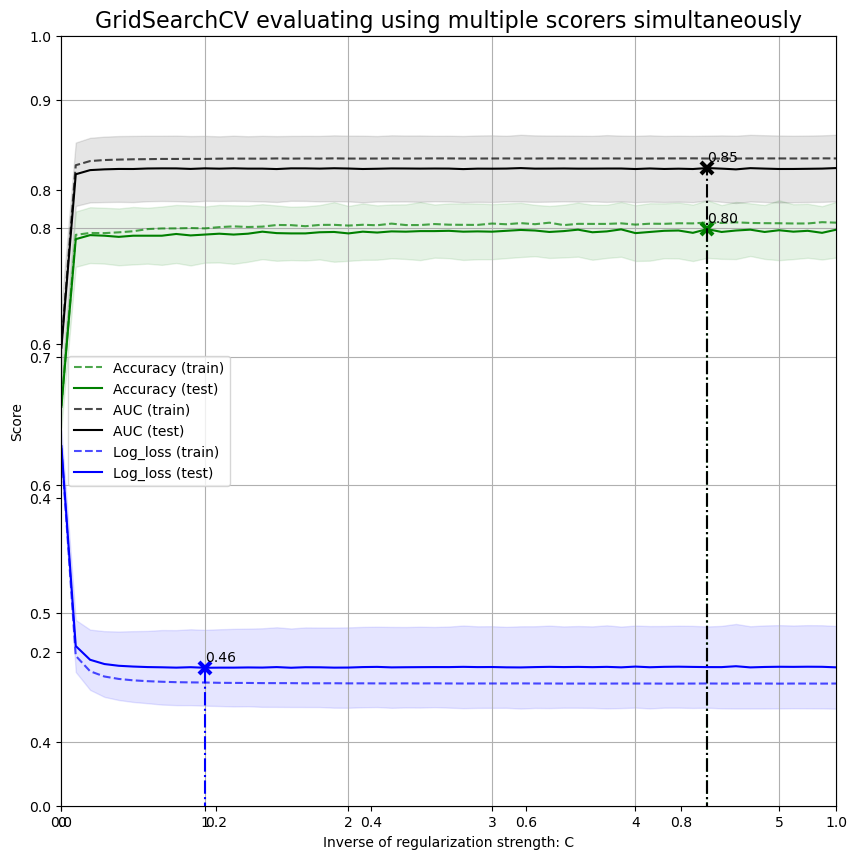

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Define simple model
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

# Simple pre-processing estimators
std_scale = StandardScaler(with_mean=False, with_std=False)
# std_scale = StandardScaler()

# Defining the CV method: Using the Repeated Stratified K Fold
n_folds = 5
n_repeats = 5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

# Creating simple pipeline and defining the gridsearch
og_clf_pipe = Pipeline(steps=[('scale', std_scale), ('clf', log_reg)])

log_clf = GridSearchCV(estimator=og_clf_pipe, cv=rskfold,
                       scoring=scoring, return_train_score=True,
                       param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('=' * 20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('=' * 20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max())
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        if scoring[scorer] == 'neg_log_loss':
            sample_score_mean = -results[f'mean_{sample}_{scorer}']
        else:
            sample_score_mean = results[f'mean_{sample}_{scorer}']
        sample_score_std = results[f'std_{sample}_{scorer}']
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label=f"{scorer} ({sample})")

    best_index = np.nonzero(results[f'rank_test_{scorer}'] == 1)[0][0]
    best_score = -results[f'mean_test_{scorer}'][best_index] if scoring[scorer] == 'neg_log_loss' else results[f'mean_test_{scorer}'][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate(f"{best_score:.2f}", (X_axis[best_index], best_score + 0.005))
plt.legend(loc="best")
plt.grid('off')
plt.show()


In [48]:
final_test['Survived'] = log_clf.predict(final_test[Selected_features])
final_test['PassengerId'] = test_df['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [49]:
import joblib
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load and preprocess your data as you did in your notebook
# Assuming you have your final training data in final_train and final_test

# Train your model
X_train = final_train[Selected_features]
y_train = final_train['Survived']

model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']